<a href="https://colab.research.google.com/github/brunoodon/mvp_sprintII/blob/main/MVP_Sprint_II(A).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP - Machine Learning - Sprint II**

# Definição do problema
É um problema de classificação, com aprendizado supervisionado. Trata-se de um dataset de transações de BitCoin para resgate de arquivos criptografados por Ransomwares.
O objetivo deste modelo é tentar prever o tipo de Ransomware baseado no aprendizado dos dados das transações durante os anos.
## Descrição do dataset:
O Bitcoin Heist Data é um histórico de transações de criptomoedas coletadas com 24 horas de intervalo. Os destinos dessas transações são grupos de criminosos que criptografaram arquivos de vitmas ao redor do mundo via infecção por Ransomwares diversos. Nesse caso, o criminoso emitia uma nota de resgate com o endereço para pagamento do resgate dos arquivos.

**Campos do dataset:**

address: endereço de bitcoin - String;

year: ano da transação - Integer;

day: dia do ano (dias corridos - de 1 a 365) - Integer;

length: Integer;

weight: Float;

count: Integer;

looped: Integer;

neighbors: Integer;

income: quantidade de Satoshis depositados (1 bitcoin = 100 milhões de Satoshis) - Integer;

label(target): família de Ransomware que infectou a vítima. Quando o label é 'White', significa que não foi possível detectar se a transação foi para pagamento de resgate ou não - String.









In [ ]:

import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
##importando os módulos da biblioteca sklearn para realizar a modelagem
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Preparação dos dados

Neste estágio, vamos carregar o dataset, ordenar por ano (mais recente) e tratar os missgins.

In [ ]:
#carregando o dataset
url = '/content/BitcoinHeistData.csv'
dataset = pd.read_csv(url).sort_values(by='year', ascending=False)
#Limpando os missings do dataset e fazendo a verificação de que realmente não existem
dataset.dropna(inplace=True)
display(dataset)
missings = dataset.isnull().sum()
display(missings)

,address,year,day,length,weight,count,looped,neighbors,income,label
23628,1F1tAaz5x1HUXrCNLbtMDqcw6o5GNn4xqX,2018,134,140,0.155440,6345,0,1,1.178321e+08,montrealRazy
11756,18JYQBHwyT62QswNfpqX5R4m88v7Q9NyPY,2018,273,2,0.070238,3,0,2,1.162654e+08,montrealFlyper
38100,1P29xxkwy6wvLxJVA2cLoXBri2hZzaweSV,2018,121,0,0.043478,1,0,1,1.099500e+08,montrealFlyper
30228,1JWxuoZPSn538fC839SL38DFrPjTJjyMNu,2017,103,70,0.062500,1,0,2,1.000500e+08,princetonCerber
30220,1JwNQSnKr3C6nxqubwbLgoy6An57pzDFsy,2017,23,2,0.500000,1,0,1,4.000000e+08,princetonLocky
...,...,...,...,...,...,...,...,...,...,...
57407,1MnGpodsBCV5TVcF8HVbXLVjjHuDGbAzK,2011,24,26,1.000000,1,0,2,3.696000e+09,white
57408,17Y6bZzAAEoq3jkyLqL3EDboAqQ3LqWxW5,2011,24,68,0.391118,54,0,2,5.700000e+07,white
57409,19suPZDNsMtfKifu31V18VWw1yUybCTy1J,2011,24,6,0.250000,1,0,2,2.980000e+08,white
57410,1C8KPQZpwRXcjNNCNXe99G5X5ZvCrNDwnR,2011,24,4,0.500000,1,0,2,4.902906e+09,white


address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

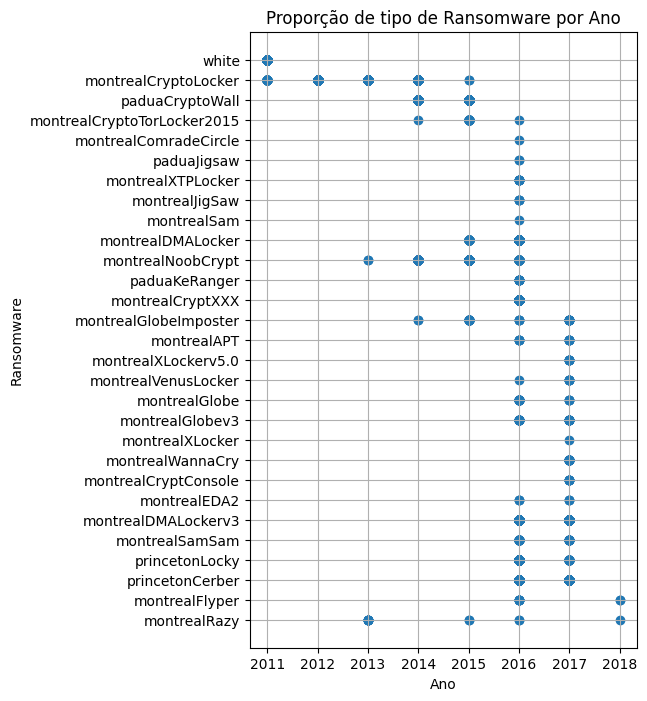

In [ ]:
#Verificando a proporção de tipo de Ransomware por ano:
df = dataset[["year", "label"]]
plt.figure(figsize=(5,8))
y = df['label']
x = df['year']
plt.scatter(x, y)
plt.title("Proporção de transações de resgate por ano Ano")
plt.xlabel("Ano")
plt.ylabel("Família de Ransomware")
plt.grid(True)
plt.show()


In [ ]:
array = dataset.values
X = array[:,1:9]
max = np.max(X)
min = np.min(X)
X_norm = (X - min) / (max - min)
y = array[:,9]
#X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.20, random_state=7)
X_norm_train, X_norm_test, y_train, y_test, = train_test_split(X_norm, y, test_size=0.20, random_state=7)
display(X_norm)

array([[5.045e-11, 3.35e-12, 3.5e-12, ..., 0.0, 2.5e-14, 2.945801925e-06],
       [5.045e-11, 6.825e-12, 5e-14, ..., 0.0, 5e-14, 2.90663615e-06],
       [5.045e-11, 3.025e-12, 0.0, ..., 0.0, 2.5e-14, 2.74875e-06],
       ...,
       [5.0275e-11, 6e-13, 1.5e-13, ..., 0.0, 5e-14, 7.45e-06],
       [5.0275e-11, 6e-13, 1e-13, ..., 0.0, 5e-14, 0.000122572647975],
       [5.0275e-11, 6e-13, 0.0, ..., 0.0, 2.5e-14, 2.5e-06]], dtype=object)

In [ ]:
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)
np.random.seed(7)
models = []
results = []
names = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


for name, model in models:
  cv_results = cross_val_score(model, X_norm_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



KNN: 0.794792 (0.003963)
CART: 0.532756 (0.005073)
NB: 0.189807 (0.006156)


In [ ]:
model = KNeighborsClassifier()
model.fit(X_norm_train, y_train)
predictions = model.predict(X_norm_test)
print(accuracy_score(y_test, predictions))

0.6987786136051121
